## Υπολογιστική Εργασία Ι: Το απειρόβαθο τετραγωνικό πηγάδι

Το άπειρο τετραγωνικό πηγάδι είναι ένα από τα λίγα προβλήματα της κβαντικής μηχανικής που μπορούν εύκολα να λυθούν σε έναν πίνακα. Αυτό το καθιστά το συνηθισμένο σημείο εκκίνησης για την εισαγωγή κβαντικών εννοιών όπως τα επίπεδα ενέργειας, η υπέρθεση και οι στατικές καταστάσεις.  Επιπλέον, το να έχουμε τις «ακριβείς» απαντήσεις καθιστά το πρόβλημα του απειρόβαθου τετραγωνικού πηγαδιού ένα μεγάλο εισαγωγικό υπολογιστικό πρόβλημα, αφού μπορούμε εύκολα να ελέγξουμε ότι το πρόγραμμά μας λειτουργεί σωστά.

Σε αυτή την εργασία θα:
1. Σχεδιάστε τα χωρικά μέρη ιδιοκαταστάσεων άπειρόβαθων τετραγωνικών πηγαδιών
* Θα απεικονίσετε με animation τη χρονική εξάρτηση των ιδιοσυναρτήσεων
* Σχηματίστε μια υπέρθεση ιδιοκαταστάσεων και θα απεικονίσετε με animation τη χρονική του εξέλιξη

Κάθε τμήμα κώδικα που πρέπει να τροποποιήσετε φέρει την ένδειξη "Ερώτηση".

### Ανασκόπηση του απειρόβαθου τετραγωνικού πηγαδιού

Ας αναθεωρήσουμε τις εξισώσεις που θα χρειαστούμε. Σύμφωνα με όσα γνωρίζουμε, για ένα ΑΤΠ που βρίσκεται μεταξύ $x=0$ και $x=a$, οι λύσεις της χρονικά ανεξάρτητης εξίσωσης Schrodinger είναι
$$\psi_n(x)=\sqrt{\frac{2}{a}}\sin \left( \frac{n\pi}{a}x \right)$$
$$E_n = \frac{n^2\pi^2\hbar^2}{2ma^2}$$
$$\Psi_n(x,t)=\psi_n(x)e^{-iE_nt/\hbar}$$

Επομένως, μια αυθαίρετη κατάσταση σε ένα ΑΤΠ μπορεί να γραφτεί ως υπέρθεση αυτών των ιδιοκαταστάσεων.
$$\Psi(x,t)=\sum_{n=1}^{\infty} c_n \psi_n(x)e^{-iE_nt/\hbar}$$
$$c_n=\int \psi_n^*(x) \Psi(x,t)dx$$
$$\sum_{n=0}^{\infty}|c_n|^2=1$$

### Χρονικές κλίμακες και μικροί αριθμοί

Οι υπολογιστές εκτελούν πράξεις με μεγάλη ακρίβεια, αλλά συχνά έχουν πρόβλημα με πολύ μεγάλους ή πολύ μικρούς αριθμούς.  Θα θέλαμε να έχουμε μια λογική κλίμακα, αποφεύγοντας άξονες με αριθμούς όπως $1,6\times10^{-23}$.  Η σταθερά του Planck ($\hbar$), οι μάζες σωματιδίων ($m$) και οι ατομικές αποστάσεις ($a$) είναι πολύ μικροί αριθμοί σε μονάδες και θα θέλαμε να έχουμε μια αίσθηση της κλίμακας με την οποία εργαζόμαστε πριν αρχίσουμε τον προγραμματισμό  Αν κοιτάξετε τους παραπάνω τύπους, θα δείτε ότι ο παράγοντας ενεργειακής φάσης καθορίζει τη χρονική κλίμακα.
$$\exp\left( -i E_n t/ \hbar\right) = \exp\left( -i \frac{n^2 \pi^2 \hbar}{2ma^2}t \right)$$

#### Ερώτηση 1
Ας υποθέσουμε ότι ένα ηλεκτρόνιο περιορίζεται σε ένα ΑΤΠ με $a=1 \unicode{x212B}. (1 \unicode{x212B} =10^{-10}m$).  Ποια είναι η περίοδος $T$ του συντελεστή φάσης για τη βασική κατάσταση;

In [69]:
import numpy  # Χρειαζόμαστε το pi
n = 1         # Θέλουμε το βασική κατάσταση
a = 1e-10     # Πλάτος πηγαδιού
m = 9.1e-31   # Μάζα ηλεκτρονίων
hbar = 1.0545718e-34    # Η σταθερά του Planck διαιρεμένη με 2pi
# Ο συντελεστής φάσης για την βασική κατάσταση είναι T= 2πhbar/En
T = (4*m*a**2)/(numpy.pi*hbar)   # Αλλάξτε αυτή τη γραμμή για να υπολογίσετε την περίοδο, T
print("The period is T =",T, " seconds")

The period is T = 1.0986904691638808e-16  seconds


C:\Users\maril\AppData\Local\Temp\ipykernel_14248\2440299208.py:53: ComplexWarning: Casting complex values to real discards the imaginary part
  norm_text.set_text('norm = %.2f' % (norm(spacing,wf)))


Βλέπουμε ότι οι τυπικές χρονικές κλίμακες για ένα πραγματικό σύστημα είναι πολύ μικρές, επομένως θα επιλέξουμε μονάδες που μας επιτρέπουν να εργαστούμε με λογικούς αριθμούς.  Για το υπόλοιπο notebook, θα δουλέψουμε  σε μια νέα χρονική κλίμακα, $$\tau = \frac{\hbar}{ma^2}t$$ και επιπλέον ας πούμε ότι $a=1m$.

### Προγραμματισμός των Ιδιοσυναρτήσεων

Ας γράψουμε μερικές συναρτήσεις για να λάβουμε τις ιδιοκαταστάσεις του ΑΤΠ ως arrays NumPy.  Πρώτα χρειαζόμαστε μια array που αντιπροσωπεύει το χώρο μας, $x=0$ έως $x=a=1$.

In [5]:
spacing = 0.005     # Για μεγαλύτερη ανάλυση, μικρύνετε ακόμη περισσοτερο το νούμερο
x = numpy.arange(0, 1, spacing)   
N = len(x)         # Αριθμός συντεταγμένων

In [6]:
N

200

In [7]:
x

array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
       0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
       0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
       0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265,
       0.27 , 0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 ,
       0.315, 0.32 , 0.325, 0.33 , 0.335, 0.34 , 0.345, 0.35 , 0.355,
       0.36 , 0.365, 0.37 , 0.375, 0.38 , 0.385, 0.39 , 0.395, 0.4  ,
       0.405, 0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 , 0.445,
       0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 ,
       0.495, 0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535,
       0.54 , 0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 ,
       0.585, 0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625,
       0.63 , 0.635,

#### Ερώτηση 2
Γράψτε μια συνάρτηση που παίρνει το $x$, σε χωρικές συντεταγμένες, και $n$, το δείκτη της ιδιοκατάστασης, και να επιστρέφει το χωρικό τμήμα της $n^{ιοστης}$ ιδιοσυνάρτησης, $\psi_n(x)$. 

In [86]:
import numpy as np
def psi_n_x(x,n, a=1):
    return (np.sqrt(2/a)*np.sin(n*np.pi*x/a)) # Αλλάξτε αυτή τη γραμμή για να επιστρέψετε τη σωστή συνάρτηση


C:\Users\maril\AppData\Local\Temp\ipykernel_14248\2440299208.py:53: ComplexWarning: Casting complex values to real discards the imaginary part
  norm_text.set_text('norm = %.2f' % (norm(spacing,wf)))


Εντάξει, τώρα ας ελέγξουμε τη συνάρτησή μας για $\psi_n(x)$.  Θα το κάνουμε αυτό με δύο τρόπους,
1. Ελέγχουμε ότι έχει κανονικοποιηθεί σωστά

Εδώ έχουμε μια συνάρτηση (norm) που θα πάρει μια συνάρτηση (με τη μορφή ενός πίνακα NumPy) και θα επιστρέψει το ολοκλήρωμα του τετραγώνου της, ή αλλιώς την norm.

In [96]:
def norm(dx, f):
    return dx*numpy.dot(f,numpy.conjugate(f))

C:\Users\maril\AppData\Local\Temp\ipykernel_14248\3069518403.py:53: ComplexWarning: Casting complex values to real discards the imaginary part
  norm_text.set_text('norm = %.2f' % (norm(spacing,wf)))


#### Ερώτηση 3
Ο παρακάτω κώδικας θα υπολογίσει τον κανόνα της ιδιοκατάστασης $n^{th}$ και θα σχεδιάσει τόσο την κυματοσυνάρτηση όσο και την κατανομή πιθανότητας.  Αλλάξτε το $n$ για να ελέγξετε μερικές διεγερμένες καταστάσεις.  Φαίνεται ότι το $\psi_n(x)$ σας είναι σωστό;  Γράψτε το σκεπτικό σας στο κελί Markdown κάτω από τις γραφικές παραστάσεις.

C:\Users\maril\AppData\Local\Temp\ipykernel_14248\2440299208.py:53: ComplexWarning: Casting complex values to real discards the imaginary part
  norm_text.set_text('norm = %.2f' % (norm(spacing,wf)))
C:\Users\maril\AppData\Local\Temp\ipykernel_14248\2922783715.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


Norm of psi_test =  1.0000000000000002


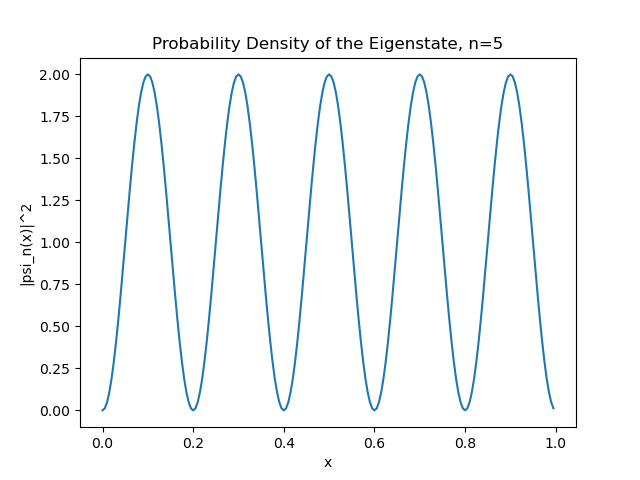

In [77]:
%matplotlib ipympl
import matplotlib
import matplotlib.pyplot as plt 

n=5     # Αλλάξτε αυτή τη γραμμή για να δοκιμάσετε διαφορετικές ιδιοκαταστάσεις
psi_test = psi_n_x(x,n)
print("Norm of psi_test = ",norm(spacing, psi_test))

plt.plot(x, psi_test)
plt.xlabel("x")
plt.ylabel("psi_n(x)")
plt.title("Wavefunction of the Eigenstate, n="+str(n))

plt.figure()
plt.plot(x, psi_test*numpy.conjugate(psi_test))  
plt.xlabel("x")
plt.ylabel("|psi_n(x)|^2")
plt.title("Probability Density of the Eigenstate, n="+str(n))
plt.show()

#### Γράψτε την απάντησή σας στην Ερώτηση 3 εδώ
Δοκιμάστηκαν οι τιμές n= 2, 3, 4 και 5. Σε όλες παρατηρείται ο,τι η κανονικοποίηση ισούται με 
1, δηλαδή υπάρχει συμφωνία με την θεωρία. Για κάθε τιμή του n παρουσιάζονται n-1 ελάχιστα και 
n μέγιστα. Συνεπώς η psi_n(x) αποτελεί μια πολύ ικανοποιητικά ορισμένη κυματοσυνάρτηση.

In [78]:
## Απάντηση 
Δοκιμάστηκαν οι τιμές n= 2, 3, 4 και 5. Σε όλες παρατηρείται οτι η κανονικοποίηση ισούται με 
1, δηλαδή υπάρχει συμφωνία με την θεωρία. Για κάθε τιμή του n παρουσιάζονται n-1 ελάχιστα και 
n μέγιστα. Συνεπώς η psi_n(x) είναι πολύ ικανοποιητική εξίσωση κυματοσυνάρτησης.

SyntaxError: invalid syntax (2523939208.py, line 2)

### Υπερθέσεις

Προχωράμε στις αυθαίρετες υπερθέσεις των ιδιοκαταστάσεων στο ΑΤΠ. Με τη νέα μας χρονική κλίμακα, $\tau$, αυτές οι υπερθέσεις μοιάζουν με:

$$\Psi(x,\tau)=\sum_{n=1}^{\infty} c_n \psi_n(x,\tau)$$
$$\psi_n(x,\tau)=\psi_n(x)e^{-in^2\pi^2\tau/2}$$
$$\sum_{n=0}^{\infty}|c_n|^2=1$$

Αυτό που θα κάνουμε τώρα είναι να γράψουμε κάποιο κώδικα που θα παίρνει ένα σύνολο συντελεστών, $c_n$, και θα κινεί τη χρονική εξέλιξη της κυματοσυνάρτησης και την κατανομή πιθανότητας του $\Psi(x,\tau)$.

### Λήψη $\psi_n(x,\tau)$
Γρήγορη ερώτηση: Είναι η $\psi_n(x)$ μια κυματοσυνάρτηση ιδιοκατάστασης; Όχι. Η πραγματική κυματοσυνάρτηση, $\psi_n(x,t)$, δίνεται κατά $\psi_n(x)$ επί του συντελεστή φάσης που εξαρτάται από το χρόνο.  Αυτό είναι εξαιρετικά σημαντικό για τη χρονική εξέλιξη των υπερθέσεων, επειδή οι παράγοντες φάσης είναι αυτοί που προκαλούν ενδιαφέρουσα χρονική εξάρτηση μέσω παρεμβολών.

Εδώ είναι μια συνάρτηση η οποία, όταν δοθεί $x$, $n$ και $\tau$ θα επιστρέψει $\psi_n(x,\tau)$. Εξοικονομούμε λίγη δουλειά επαναχρησιμοποιώντας τη συνάρτησή μας για να υπολογίσουμε $\psi_n(x)$.

In [94]:
def psi_n_x_t(x, n, t):
    return psi_n_x(x,n)*numpy.exp(-1j*n**2 * numpy.pi**2 * t /2)

### Λήψη $\Psi(x,\tau)$
Τώρα θα γράψουμε μια συνάρτηση που θα λάβει ως είσοδο τα $x$, $\tau$ και τους συντελεστές ιδιοκατάστασης $c_n$ (ως πίνακα NumPy) και θα επιστρέψει την κυματοσυνάρτηση υπέρθεσης τη στιγμή $\tau$, $\Psi(x,\tau)$.

#### Ερώτηση 4
Ολοκληρώστε την παρακάτω συνάρτηση, "wavefunction(x,t,cn)", ώστε να επιστρέψει την $\Psi(x,\tau)$.

In [93]:
def wavefunction(x, t, cn):
    
    # Αρχικά ελέγχουμε ότι οι συντελεστές υπακούουν στον κανόνα ότι η συνολική πιθανότητα = 1
    total_probability = numpy.dot(numpy.conjugate(cn),cn)
    if(not abs(total_probability - 1) < 1e-6):    
        print("Error! Sum of the conefficients squared does not equal 1! Total Probability =", total_probability)
        return
    
    # Τώρα δημιουργούμε μια κενή κυματοσυνάρτηση.  Θα προσθέσουμε κάθε ιδιοκατάσταση σε αυτό, σταθμισμένη με τους κατάλληλους συντελεστές.
    wf = numpy.zeros_like(x)
    for n in range(0,len(cn)):
        wf = wf + cn[n]*psi_n_x_t(x, n, t)  # Αυτή είναι η γραμμή που πρέπει να διορθώσετε!
        
    return wf

C:\Users\maril\AppData\Local\Temp\ipykernel_14248\2440299208.py:53: ComplexWarning: Casting complex values to real discards the imaginary part
  norm_text.set_text('norm = %.2f' % (norm(spacing,wf)))


## Παίρνωντας το $\Psi(x,\tau)$
Τώρα μπορούμε να ζωντανέψουμε τη χρονική εξέλιξη μιας αυθαίρετης υπέρθεσης! Απλώς πρέπει να καθορίσουμε τους συντελεστές $c_n$.  Εδώ, θα ξεκινήσουμε με μια ίση υπέρθεση ενεργειακών ιδιοκαταστάσεων $n=1,2,4,6$.  Αλλά μπορείτε να δημιουργήσετε οποιοδήποτε μείγμα θέλετε, αρκεί να υπακούουν $\sum_n |c_n|^2=1$! Μπορείτε να συμπεριλάβετε ιδιοκαταστάσεις υψηλότερης ενέργειας προσθέτοντας περισσότερα στοιχεία στον πίνακα $c_n$.

In [92]:
#Η array των coefficients μας λεει τη ποσοστό της κάθε ιδοσυνάρτησης βρίσκεται στην υπέρθεση
#cn=numpy.array([numpy.sqrt(1./4), numpy.sqrt(1./4),0,numpy.sqrt(1./4),0, numpy.sqrt(1./4),0])
cn=numpy.array([0,1,0,0,0])


Παρακάτω είναι ο κώδικας για την κίνηση του $\Psi(x,\tau)$.  Όπως συμβαίνει συχνά, ο κώδικας για να γίνει αυτό καταλαμβάνει πολύ χώρο, αλλά αποτελείται απλώς από ένα σωρό απλές εντολές. (Π.χ. Ρύθμιση ετικετών αξόνων, καθορισμός περιοχών κ.λπ.) Όταν εκτελείτε το κελί, ο κώδικας θα χρησιμοποιεί τη συνάρτηση "wavefunction(x,t,cn)" για να δημιουργήσει το animation.  Θα εμφανιστούν τρία animation, για $Re[\Psi(x,\tau)]$, $Im[\Psi(x,\tau)]$ και την πυκνότητα πιθανότητας, $|\Psi(x,\tau)|^2$.


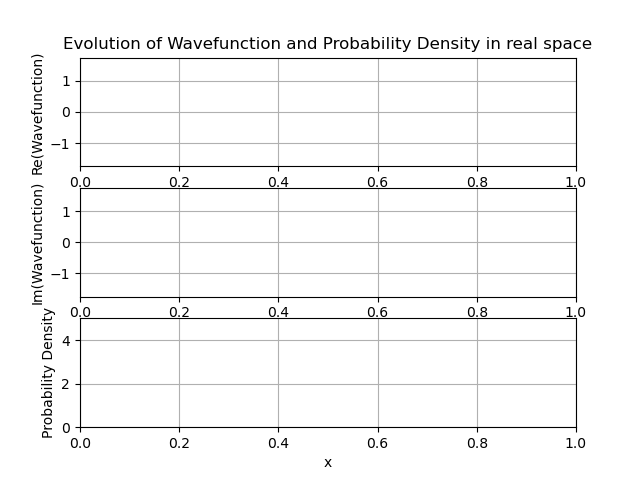

In [91]:
import matplotlib.animation as animation
  
cn = numpy.array([0, 1, 0, 0, 0])   
# δημιουργήστε ένα σχήμα με τρια subplots
fig, (ax1, ax2, ax3) = plt.subplots(3,1)

# αρχικοποιήστε τρία αντικείμενα γραμμής (ένα σε κάθε άξονα)
line1, = ax1.plot([], [], lw=2)
line2, = ax2.plot([], [], lw=2, color='g')
line3, = ax3.plot([], [], lw=2, color='r')
line = [line1, line2, line3]

# οι ίδιες αρχικοποιήσεις αξόνων με πριν (απλά τώρα το κάνουμε και για τους δύο)
ax1.set_ylim(-1.75, 1.75)
ax1.set_xlim(0, 1)
ax1.grid()
ax1.set_ylabel("Re(Wavefunction)")
ax1.set_title("Evolution of Wavefunction and Probability Density in real space")

ax2.set_ylim(-1.75, 1.75)
ax2.set_xlim(0, 1)
ax2.grid()
ax2.set_ylabel("Im(Wavefunction)")

ax3.set_ylim(0, 5)
ax3.set_xlim(0, 1)
ax3.grid()
ax3.set_xlabel("x")
ax3.set_ylabel("Probability Density")

time_text = ax1.text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax1.transAxes)
norm_text = ax1.text(0.05, 0.85,'',horizontalalignment='left',verticalalignment='top', transform=ax1.transAxes)
time_per_frame = 0.0001     # Θα μπορούσατε να το αλλάξετε για να κάνετε την κινούμενη εικόνα πιο γρήγορη ή πιο αργή

def run_init():
    line[0].set_data([], [])
    line[1].set_data([], [])
    line[2].set_data([], [])
    return line,
    
def run(i):
    wf = wavefunction(x, time_per_frame*i, cn)
    y1data = numpy.real(wf)
    y2data = numpy.imag(wf)
    y3data = numpy.conjugate(wf)*wf

    # ενημερώνουμε τα δεδομένα των τριών αντικειμένων γραμμής
    line[0].set_data(x, y1data)
    line[1].set_data(x, y2data)
    line[2].set_data(x, y3data)
    # Εμφάνιση της τρέχουσας χρονικής στιγμής των κινουμένων σχεδίων
    time_text.set_text('tau = %.2f' % (i*time_per_frame))
    norm_text.set_text('norm = %.2f' % numpy.real(norm(spacing,wf)))
    return line, time_text, norm_text

ani = animation.FuncAnimation(fig, run, init_func=run_init,
                               frames=1000, interval=20, blit=True)
    
# ani;
plt.show()

#### Ερώτηση 5
Τροποποιήστε τον πίνακα συντελεστών, $c_n$, επάνω, έτσι ώστε να κάνετε το animation μιας μοναδικής ιδιοκατάστασης ενέργειας. Περιγράψτε πώς μοιάζουν τα $Re[\Psi(x,\tau)]$, $Im[\Psi(x,\tau)]$ και η πυκνότητα πιθανότητας, $|\Psi(x,\tau)|^2$.

Αφού ορίστηκε n=2  παρατηρήθηκε ό,τι η πυκνότητα πιθανότητας παραμένει σταθερή με τον χρόνο, ενώ το φανταστικό $Im[\Psi(x,\tau)]$ και πραγματικό $Re[\Psi(x,\tau)]$ μέρος της κυματοσυνάρτησης εκτελούν μια ημιτονοειδή συνάρτηση, σχηματίζοντας κόμβο στο x=0.5. Εντοπίζεται ένας κόμβος στο κάθε γράφημα καθώς έχουμε ορίσει το n=2.